In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

from sklearn import linear_model
from statsmodels.stats.diagnostic import het_white

from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Section I Introduction

# Section II Literature Review

# Section III Methodology

## 3.1 ARIMA Model

ARIMA model has notable strengths for forecasting carbon prices, utilizing its robust capability to process time series data and capture the dynamic patterns in the volatile carbon prices. These features facilitate a comprehensive analysis, making ARIMA an ideal choice for short-term forecasting. However, we also need to acknowledge its potential limitations, such as the assumption of linearity and the need for data stationarity, which may cause potential issues.

Central to the ARIMA model is its ability to integrate autoregressive (AR) processes, differencing (I) to achieve stationarity, and moving average (MA) processes into a unified structure. The model is parameterized by three integers: $p$, $d$, and $q$, which denote the autoregressive order, the degree of differencing, and the moving average order, respectively. Mathematically, the ARIMA($p$,$d$,$q$) model is expressed as:
$$
x_t = u + \alpha_1 x_{t-1} + \alpha_2 x_{t-2} + \ldots + \alpha_p x_{t-p} - \beta_1 \varepsilon_{t-1} - \beta_2 \varepsilon_{t-2} - \ldots - \beta_q \varepsilon_{t-q} + \varepsilon_t
$$

Here, $x_t$ represents the forcasted carbon price at time $t$, and $u$ is a constant term (which can be interpreted as the mean of the series if $d = 0 $). The parameters $\alpha_1, \alpha_2, \ldots, \alpha_p$ represent the autoregressive (AR) terms, $\beta_1, \beta_2, \ldots, \beta_q$ represent the moving average (MA) terms, and $\varepsilon_{t-1}, \varepsilon_{t-2}, \ldots, \varepsilon_{t-q}$ are the lagged forecast errors in the prediction equation.

In this study, we employed the ARIMA model to analyze fluctuations in carbon prices. Our approach commenced with an initial hypothesis based on a preliminary examination of the dataset to identify any apparent trends and autocorrelations. Utilizing diagnostic tools such as autocorrelation and partial autocorrelation plots, alongside statistical tests, we determined the optimal differencing order and the appropriate orders for the autoregressive and moving average components of the model. This step also included assessments for the inclusion of seasonal adjustments. Subsequent to model identification, we engaged in parameter estimation through Maximum Likelihood Estimation methods to accurately fit the model to the historical data. The model was then validated to ensure that the residuals approximated white noise, indicating that the model captured the essential structures in the data. Following validation, we proceeded to utilize the ARIMA model for forecasting future carbon prices, leveraging its capability to analyze and interpret underlying trends in the data over various forecasting horizons. This methodological framework underpins our analysis and forecasts presented herein.

## 3.2 Random Forest

In this study, the Random Forest (RF) methodology was employed as the second ensemble-based predictive model for forecasting carbon prices. Random Forest is a form of the ensemble method known as Bagging, or Bootstrap Aggregating, which operates on the principle of creating multiple datasets from the original training set through bootstrap sampling. This sampling technique involves random selection with replacement, resulting in subsets where individual instances may repeat or be excluded.

Renowned for its robustness, the Random Forest is inherently adept at handling large, high-dimensional datasets and mitigating overfitting—a common pitfall in complex models. The ensemble nature of Random Forest, where multiple decision trees vote on the outcome, reduces variance and enhances performance stability. Nonetheless, it may incur considerable computational expense, particularly with a large number of trees, and can be less interpretable due to its ensemble complexity.

Implementation within this study followed a systematic approach: An ensemble of decision trees was constructed, each predicated on a distinct bootstrap sample. Key parameters, such as the number of trees (denoted as n_estimators in machine learning frameworks), maximum depth, and the number of features considered at each split, were meticulously calibrated. The decision trees were trained individually, allowing the model to capture complex, nonlinear relationships without relying on a single overarching trend. For the predictive phase, the Random Forest aggregated outputs from individual trees. In regression tasks, such as the prediction of carbon prices, the ensemble's prediction corresponds to the average of the outputs, thereby converging towards a central tendency.

## 3.3 LSTM Model

Long-Shot Term memory is a type of recurrent neural network used in commonly used in price prediction and sentiment analysis. The concept of LSTM is proposed in 1997 by Sepp Hochreiter as a solution to the vanishing gradient problem faced by recurrent neural networks(Hochreiter & Schmidhuber, 1997). The vanishing gradient problem is when the weights of earlier layers getting barely adjusted during the process of backpropagation, leading to the earlier layers of the neural network unable to learn anything. This results in the Recurrent Neural networks being incapable of recognizing long-term dependencies, making them suboptimal for analyzing complex problems.

LSTM is a special type of recurrent neural network where the hidden layers are replaced by LSTM cells. For each LSTM cell, two states are transferred to the next cell: the cell state and the hidden state. Each LSTM cell determines what information in the cell state to modify by using three gates: the forget gate, the input gate, and the output gate. 
The mathematical structure of LSTM:
$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$
$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
$$
$$
o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
$$
$$
c_t = \tanh(W_c \cdot [h_{t-1}, x_t] + b_c)
$$
$$
h_t = o_t \ast \tanh(c_t)
$$

The forget gate $f_t$ regulates the removal of information from the cell state. It takes in the previous hidden state $h_{t-1}$ and the current input $x_t$ and outputs a value between 0 and 1 using a sigmoid function. The closer to zero the output is, the more the cell state information is forgotten. The input gate $i_t$ takes decides what information to store into the cell state. The input gate $i_t$ takes the previous hidden state $h_{t-1}$ and the current input $x_t$ and passes them into the sigmoid function and tanh function, respectively, multiplying the result and adding it into the cell state $c_t$.

The output gate $o_t$ determines what information to pass into the next hidden state. The decision is multiplied with the current cell state and passed onto the next LSTM cell as the hidden state. The sigmoid and tanh function serve as activation functions, preventing the input and output from getting bigger than one or negative one, and exploding or vanishing due to exponential growth or decay.

# Section IV Data and Descriptive Statistics

In [2]:
carbon_price_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Carbon%20Price.csv'
carbon_price = pd.read_csv(carbon_price_url, header=0)
carbon_price['Date'] = pd.to_datetime(carbon_price['Date'])

energy_price_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Energy.csv'
energy_price = pd.read_csv(energy_price_url, header=0)
energy_price['Date'] = pd.to_datetime(energy_price['Date'])

policy_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Policy.csv'
policy = pd.read_csv(policy_url, header=0)
policy['Date'] = pd.to_datetime(policy['Date'])

market_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Market.csv'
market = pd.read_csv(market_url, header=0)
market['Date'] = pd.to_datetime(market['Date'])

weather_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Weather.csv'
weather = pd.read_csv(weather_url, header=0)
weather['Date'] = pd.to_datetime(weather['Date'])

# Perform the merges
df = pd.merge(carbon_price, energy_price, on='Date', how='inner')
df = pd.merge(df, policy, on='Date', how='inner')
df = pd.merge(df, market, on='Date', how='inner')
df = pd.merge(df, weather, on='Date', how='inner')
df = df.dropna()

In [3]:
df = df.sort_values(by=['Date'])

In [4]:
df.head()

,Date,Carbon,Coal,Crude Oil,Natural Gas,Fit_for_55,Law,Compromise,EPU,DAX,SPGTCLNT,FTMIB,CAC40,AEX,STOXX,Temperature,Precipitation,Solar Energy,Wind Speed
1122,2021-01-04,33.89,69.30,51.09,19.845,0,0,0,231.37864,13726.74,2342.44,22315.87,5588.96,631.03,401.69,2.8,0.170,0.8,9.6
1121,2021-01-05,33.15,64.90,53.60,18.005,0,0,0,231.37864,13651.22,2390.04,22200.60,5564.60,633.62,400.94,2.7,0.012,0.6,9.4
1120,2021-01-06,33.83,64.25,54.30,17.565,0,0,0,231.37864,13891.97,2518.59,22734.32,5630.60,639.16,406.41,3.2,0.047,0.6,8.2
1119,2021-01-07,34.97,66.60,54.38,19.305,0,0,0,231.37864,13968.24,2692.75,22746.08,5669.85,637.41,408.49,2.8,0.125,1.6,7.1
1118,2021-01-08,35.14,68.50,55.99,20.120,0,0,0,231.37864,14049.53,2720.79,22793.94,5706.88,645.60,411.17,2.2,0.082,2.2,5.6


In [5]:
df['Carbon'].count()

763

In the analysis of carbon pricing trends within the European Union's Emissions Trading System (EU ETS), this study draws upon a meticulously compiled dataset encompassing the period from January 1, 2021, to January 31, 2024. During this time frame, a total of 763 data points were collected, providing a granular view of carbon price movements. The carbon price data, sourced from Investing.com, is critical for understanding the economic implications of regulatory shifts and market dynamics under the EU's climate policy framework.

This timeframe is deliberately aligned with the initiation of Phase 4 of the European Union's Emissions Trading System (EU ETS), marking a significant transition from the system's previous phases. The focus on this specific period is due to the substantial regulatory shifts introduced in Phase 4, which differ markedly from the earlier phases in terms of emissions reduction targets and allowance allocation mechanisms.

Notably, in Phase 3 of the EU ETS (2013-2020), the Union-wide cap for stationary installations was subject to an annual decrease by a linear reduction factor of 1.74%, with the 2013 cap determined based on the average total quantity of allowances issued annually during 2008-2012. Conversely, Phase 4 (2021-2030) introduces a more aggressive approach to emissions reduction, with the cap on emissions decreasing annually at an increased linear reduction factor of 2.2%. This heightened ambition reflects the EU's commitment to achieving more substantial emissions reductions and necessitates an in-depth analysis of carbon pricing trends under the new regulatory framework. The study aims to isolate the impacts of these changes on carbon pricing, underscoring the importance of understanding the dynamics introduced by Phase 4's enhanced regulatory measures.

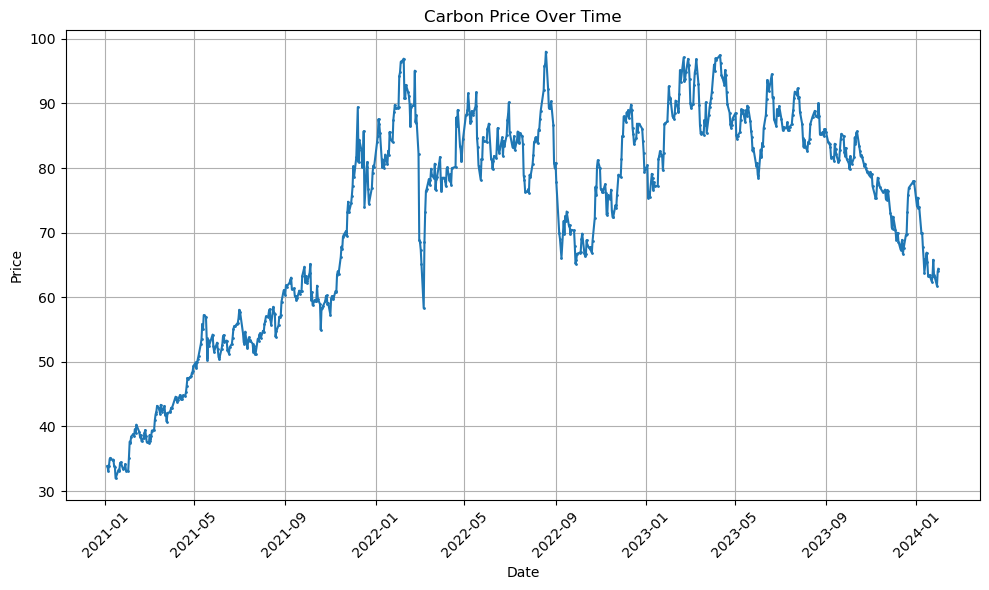

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Carbon'], marker='o', markersize=1, linestyle='-')
plt.title('Carbon Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
for column_name in df.columns[1:]:
    column = df[column_name]
    mean = column.mean()
    variance = column.var()
    sd = column.std()
    max_value = column.max()
    min_value = column.min()
    
    print(column_name)
    print("Mean:", mean)
    print("Variance:", variance)
    print("Standard Deviation:", sd)
    print("Maximum:", max_value)
    print("Minimum:", min_value)
    print()

Carbon
Mean: 72.98309305373526
Variance: 270.6564305779435
Standard Deviation: 16.45163914562751
Maximum: 98.01
Minimum: 31.96

Coal
Mean: 176.4729357798164
Variance: 8734.749716041804
Standard Deviation: 93.459882923326
Maximum: 439.0
Minimum: 63.75

Crude Oil
Mean: 83.81741808650057
Variance: 203.24808426985655
Standard Deviation: 14.256510241635452
Maximum: 127.98
Minimum: 51.09

Natural Gas
Mean: 72.44877326343381
Variance: 2982.6553067792283
Standard Deviation: 54.61369156886603
Maximum: 339.195
Minimum: 15.525

Fit_for_55
Mean: 0.8296199213630406
Variance: 0.14153620705668177
Standard Deviation: 0.376212980978437
Maximum: 1
Minimum: 0

Law
Mean: 0.21756225425950196
Variance: 0.1704523173135469
Standard Deviation: 0.4128587135008136
Maximum: 1
Minimum: 0

Compromise
Mean: 0.24508519003931847
Variance: 0.18526124601397334
Standard Deviation: 0.43041984853625576
Maximum: 1
Minimum: 0

EPU
Mean: 276.8771762858453
Variance: 4871.8912743413875
Standard Deviation: 69.79893462182204
Maxi

The descriptive statistics of our dataset from January 2021 to January 2024 reveal the carbon price's behavior during the EU ETS Phase 4, with a mean value of €72.98 and standard deviation indicating market volatility. The time series plot underscores these price fluctuations over the 763 observations. Complementing this, we observed varied patterns in related energy commodities and European stock indices, alongside weather variables that could influence emission levels and carbon market dynamics, all of which will be explored further in our econometric analysis.

### Test for Multicollinearity

In [8]:
# Drop the 'Date' and 'Carbon' columns before calculating VIF
df_numeric = df.drop(columns=['Date', 'Carbon'])

# Initialize a DataFrame to store VIF results
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

print(vif_data)

          Feature           VIF
0            Coal     74.107461
1       Crude Oil    278.930559
2     Natural Gas     24.272691
3      Fit_for_55     38.194815
4             Law     15.447276
5      Compromise     12.519092
6             EPU     65.929011
7             DAX  12001.686917
8        SPGTCLNT    132.011553
9           FTMIB   5479.306812
10          CAC40   2743.642110
11            AEX   5818.402102
12          STOXX  12428.629219
13    Temperature     14.243452
14  Precipitation      1.304320
15   Solar Energy      7.960605
16     Wind Speed     10.874388


In [9]:
# Check correlations between stock indices
stock_columns = ['DAX', 'SPGTCLNT', 'FTMIB', 'CAC40', 'AEX', 'STOXX']
print(df_numeric[stock_columns].corr())

               DAX  SPGTCLNT     FTMIB     CAC40       AEX     STOXX
DAX       1.000000 -0.283918  0.912680  0.804923  0.854027  0.881508
SPGTCLNT -0.283918  1.000000 -0.548251 -0.620263 -0.263157 -0.262386
FTMIB     0.912680 -0.548251  1.000000  0.908032  0.811391  0.818125
CAC40     0.804923 -0.620263  0.908032  1.000000  0.818160  0.824418
AEX       0.854027 -0.263157  0.811391  0.818160  1.000000  0.951225
STOXX     0.881508 -0.262386  0.818125  0.824418  0.951225  1.000000


In [10]:
# Check correlations between energy prices
energy_columns = ['Coal', 'Crude Oil', 'Natural Gas']
print(df_numeric[energy_columns].corr())

                 Coal  Crude Oil  Natural Gas
Coal         1.000000   0.823675     0.865181
Crude Oil    0.823675   1.000000     0.606318
Natural Gas  0.865181   0.606318     1.000000


### PCA

In [11]:
# Step 1: Combine Stock Indices using PCA
cols_to_pca_stock = ['DAX', 'STOXX', 'FTMIB', 'CAC40', 'AEX','SPGTCLNT']

# Standardize the stock index data
scaler = StandardScaler()
X_pca_stock = scaler.fit_transform(df[cols_to_pca_stock])

# Apply PCA for stock indices
pca_stock = PCA(n_components=1)
X_pca_stock_reduced = pca_stock.fit_transform(X_pca_stock)

# Step 2 (Optional): Combine Energy Prices using PCA
cols_to_pca_energy = ['Crude Oil', 'Coal', 'Natural Gas']

# Standardize the energy price data
X_pca_energy = scaler.fit_transform(df[cols_to_pca_energy])

# Apply PCA for energy prices
pca_energy = PCA(n_components=1)
X_pca_energy_reduced = pca_energy.fit_transform(X_pca_energy)

# Step 3: Create df_arima without modifying df
# Select all other columns except the original stock indices and energy prices
other_columns = [col for col in df.columns if col not in cols_to_pca_stock + cols_to_pca_energy]

# Create the new DataFrame with the PCA components and other columns
df_arima = df[other_columns].copy()  # Copy the rest of the columns
df_arima['PCA_Stock_Index'] = X_pca_stock_reduced
df_arima['PCA_Energy_Prices'] = X_pca_energy_reduced

In [12]:
# Drop the 'Date' and 'Carbon' columns before calculating VIF
df_numeric_new = df_arima.drop(columns=['Date', 'Carbon','Law','Compromise','Fit_for_55'])

# Initialize a DataFrame to store VIF results
vif_data_new = pd.DataFrame()
vif_data_new["Feature"] = df_numeric_new.columns
vif_data_new["VIF"] = [variance_inflation_factor(df_numeric_new.values, i) for i in range(df_numeric_new.shape[1])]

print(vif_data_new)

             Feature        VIF
0                EPU  11.711455
1        Temperature   8.886121
2      Precipitation   1.258885
3       Solar Energy   4.239777
4         Wind Speed   9.320415
5    PCA_Stock_Index   1.227304
6  PCA_Energy_Prices   1.775570


# Section V Forcasting of Carbon Price

## 5.1 Evaluation Criteria

## 5.2 Parameter Determination

### ARIMA Model

##### AR(1)

In [13]:
y = df_arima['Carbon']

modelAR1 = AutoReg(y, lags=1)
resultAR1 = modelAR1.fit()

print(resultAR1.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                     AutoReg(1)   Log Likelihood               -1631.975
Method:               Conditional MLE   S.D. of innovations              2.060
Date:                Wed, 25 Sep 2024   AIC                           3269.951
Time:                        11:44:17   BIC                           3283.859
Sample:                             1   HQIC                          3275.306
                                  763                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8752      0.339      2.578      0.010       0.210       1.541
Carbon.L1      0.9886      0.005    217.881      0.000       0.980       0.997
                                    Roots           

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
adf_result = adfuller(y)

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.496120
p-value: 0.116421
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [15]:
y_diff = y.diff().dropna()


modelAR1_diff = AutoReg(y_diff, lags=1)
resultAR1_diff = modelAR1_diff.fit()

print(resultAR1_diff.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Carbon   No. Observations:                  762
Model:                     AutoReg(1)   Log Likelihood               -1632.661
Method:               Conditional MLE   S.D. of innovations              2.068
Date:                Wed, 25 Sep 2024   AIC                           3271.322
Time:                        11:44:17   BIC                           3285.226
Sample:                             1   HQIC                          3276.676
                                  762                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0428      0.075      0.571      0.568      -0.104       0.190
Carbon.L1     -0.0448      0.036     -1.236      0.216      -0.116       0.026
                                    Roots           

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


##### AR(2)

In [16]:
modelAR2 = AutoReg(y, lags=2)
resultAR2 = modelAR2.fit()

print(resultAR2.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                     AutoReg(2)   Log Likelihood               -1629.492
Method:               Conditional MLE   S.D. of innovations              2.059
Date:                Wed, 25 Sep 2024   AIC                           3266.983
Time:                        11:44:17   BIC                           3285.522
Sample:                             2   HQIC                          3274.122
                                  763                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8821      0.341      2.587      0.010       0.214       1.550
Carbon.L1      0.9469      0.036     26.151      0.000       0.876       1.018
Carbon.L2      0.0416      0.036      1.152      0.2

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [17]:
residuals = resultAR2.resid

if np.isnan(residuals).any() or np.isinf(residuals).any():
    residuals = residuals[~(np.isnan(residuals) | np.isinf(residuals))]

adf_test = adfuller(residuals)

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -12.798021
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [18]:
X = df_arima.drop(columns=['Date','Carbon'])
_y = df_arima['Carbon']

<Figure size 1000x600 with 0 Axes>

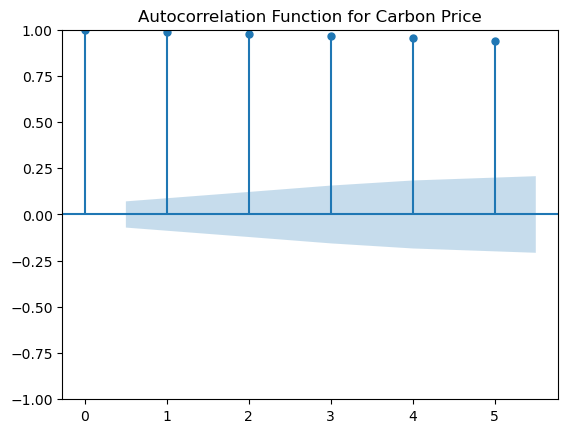

In [19]:
plt.figure(figsize=(10, 6))
plot_acf(df_arima['Carbon'], lags=5, alpha=0.05)
plt.title('Autocorrelation Function for Carbon Price')
plt.show()

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

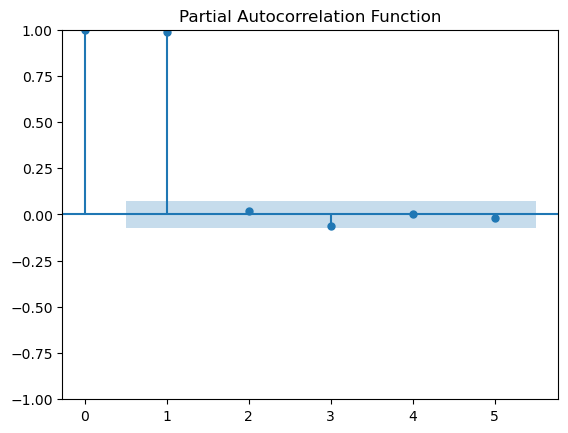

In [20]:
plt.figure(figsize=(10, 6))
plot_pacf(_y, lags=5, alpha=0.05)
plt.title('Partial Autocorrelation Function')
plt.show()

##### ARIMA(1,0,0)

In [21]:
model_arima100 = ARIMA(_y, exog=X, order=(1,0,0))
model_arima100_fit = model_arima100.fit()

print(model_arima100_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1605.501
Date:                Wed, 25 Sep 2024   AIC                           3237.002
Time:                        11:44:21   BIC                           3297.286
Sample:                             0   HQIC                          3260.212
                                - 763                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                51.5424    111.467      0.462      0.644    -166.929     270.013
Fit_for_55            1.7925      3.374      0.531      0.595      -4.821       8.406
Law                  -1.

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### ARIMA(1,0,1)

In [22]:
model_arima101 = ARIMA(_y, exog=X, order=(1,0,1))
model_arima101_fit = model_arima101.fit()

print(model_arima101_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1602.825
Date:                Wed, 25 Sep 2024   AIC                           3233.649
Time:                        11:44:25   BIC                           3298.571
Sample:                             0   HQIC                          3258.645
                                - 763                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                51.5986    105.569      0.489      0.625    -155.313     258.511
Fit_for_55            2.0090      2.963      0.678      0.498      -3.799       7.817
Law                  -1.

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### ARIMA(1,1,0)

In [23]:
model_arima110 = ARIMA(_y, exog=X, order=(1,1,0))
model_arima110_fit = model_arima110.fit()

print(model_arima110_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1597.397
Date:                Wed, 25 Sep 2024   AIC                           3218.794
Time:                        11:44:27   BIC                           3274.425
Sample:                             0   HQIC                          3240.214
                                - 763                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fit_for_55            0.5834     48.254      0.012      0.990     -93.993      95.160
Law                  -2.9904     40.910     -0.073      0.942     -83.173      77.193
Compromise            2.

##### ARIMA(1,1,1); Best Performing Model

In [24]:
model_arima111 = ARIMA(_y, exog=X, order=(1,1,1))
model_arima111_fit = model_arima111.fit()

print(model_arima111_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1594.943
Date:                Wed, 25 Sep 2024   AIC                           3215.887
Time:                        11:44:31   BIC                           3276.154
Sample:                             0   HQIC                          3239.092
                                - 763                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fit_for_55            0.6279     20.785      0.030      0.976     -40.109      41.365
Law                  -3.0274     10.463     -0.289      0.772     -23.535      17.480
Compromise            2.

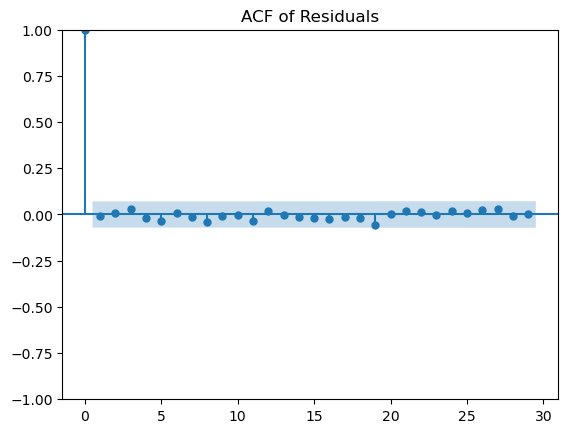

In [25]:
model_fit = model_arima111.fit()

# Get the residuals
residuals = model_fit.resid

# Plot the ACF of residuals
plot_acf(residuals, alpha=0.05)
plt.title('ACF of Residuals')
plt.show()

##### ARIMA(2,0,0)

In [26]:
model_arima200 = ARIMA(_y, exog=X, order=(2,0,0))
model_arima200_fit = model_arima200.fit()

print(model_arima200_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1602.221
Date:                Wed, 25 Sep 2024   AIC                           3232.443
Time:                        11:44:39   BIC                           3297.364
Sample:                             0   HQIC                          3257.438
                                - 763                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                51.1642    104.305      0.491      0.624    -153.270     255.599
Fit_for_55            1.7550      3.718      0.472      0.637      -5.532       9.042
Law                  -1.

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### ARIMA(2,1,0)

In [27]:
model_arima210 = ARIMA(_y, exog=X, order=(2,1,0))
model_arima210_fit = model_arima210.fit()

print(model_arima210_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1595.250
Date:                Wed, 25 Sep 2024   AIC                           3216.499
Time:                        11:44:42   BIC                           3276.767
Sample:                             0   HQIC                          3239.704
                                - 763                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fit_for_55            0.7280     27.132      0.027      0.979     -52.450      53.906
Law                  -3.0965      8.189     -0.378      0.705     -19.147      12.954
Compromise            2.

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### ARIMA(2,0,1)

In [28]:
model_arima201 = ARIMA(_y, exog=X, order=(2,0,1))
model_arima201_fit = model_arima201.fit()

print(model_arima201_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1619.596
Date:                Wed, 25 Sep 2024   AIC                           3269.192
Time:                        11:44:47   BIC                           3338.751
Sample:                             0   HQIC                          3295.973
                                - 763                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                48.6777     37.644      1.293      0.196     -25.103     122.458
Fit_for_55           10.5830      0.596     17.746      0.000       9.414      11.752
Law                  -8.

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### ARIMA(2,1,1)

In [29]:
model_arima211 = ARIMA(_y, exog=X, order=(2,1,1))
model_arima211_fit = model_arima211.fit()

print(model_arima211_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1595.001
Date:                Wed, 25 Sep 2024   AIC                           3218.001
Time:                        11:44:51   BIC                           3282.904
Sample:                             0   HQIC                          3242.991
                                - 763                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fit_for_55            1.1819     10.883      0.109      0.914     -20.149      22.513
Law                  -3.4375      5.233     -0.657      0.511     -13.694       6.819
Compromise            2.

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations Used']
    for value, label in zip(result, labels):
        print(f'{label} : {value}')
    if result[1] <= 0.05:
        print("Stationary")
    else:
        print("Non-stationary")

# Apply ADF test to each column
for column in df_arima.columns:
    adf_test(df_arima[column], title=column)

Augmented Dickey-Fuller Test: Date
ADF Test Statistic : 9.71877584213041
p-value : 1.0
# Lags Used : 10
# Observations Used : 752
Non-stationary
Augmented Dickey-Fuller Test: Carbon
ADF Test Statistic : -2.496119824433623
p-value : 0.11642127012289788
# Lags Used : 5
# Observations Used : 757
Non-stationary
Augmented Dickey-Fuller Test: Fit_for_55
ADF Test Statistic : -2.2105125985713
p-value : 0.202452138872532
# Lags Used : 0
# Observations Used : 762
Non-stationary
Augmented Dickey-Fuller Test: Law
ADF Test Statistic : -0.5254702737680361
p-value : 0.88694957949878
# Lags Used : 0
# Observations Used : 762
Non-stationary
Augmented Dickey-Fuller Test: Compromise
ADF Test Statistic : -0.5680046096316663
p-value : 0.8780490322937853
# Lags Used : 0
# Observations Used : 762
Non-stationary
Augmented Dickey-Fuller Test: EPU
ADF Test Statistic : -2.1566321856318083
p-value : 0.22236009113880895
# Lags Used : 0
# Observations Used : 762
Non-stationary
Augmented Dickey-Fuller Test: Temperat

In [31]:
df_diff = df_arima.diff().dropna()  # Apply differencing to make data stationary

In [32]:
from statsmodels.tsa.api import VAR

# Combine Carbon prices with exogenous variables
combined_data = df_diff[['Carbon', 'Fit_for_55', 'Law', 'Compromise', 'EPU', 
                         'Temperature', 'Precipitation', 'Solar Energy', 
                         'Wind Speed', 'PCA_Stock_Index', 'PCA_Energy_Prices']]

# Fit the VAR model
model = VAR(combined_data)
var_model_fit = model.fit(maxlags=15, ic='aic')  # Select lag length based on AIC
print(var_model_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 25, Sep, 2024
Time:                     11:44:51
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                   -8.65377
Nobs:                     760.000    HQIC:                  -9.60222
Log likelihood:          -7734.78    FPE:                3.73203e-05
AIC:                     -10.1962    Det(Omega_mle):     2.68853e-05
--------------------------------------------------------------------
Results for equation Carbon
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.044875         0.075113            0.597           0.550
L1.Carbon                   -0.063358         0.038133           -1.661           0.097
L1.Fit_for_55               -0.

## 5.3 Performance and Results

### ARIMA Model

In [33]:
y = df_arima['Carbon']

In [34]:
train_size = int(len(df_arima) * 0.8)
train_indices = df_arima.index[:train_size]
test_indices = df_arima.index[train_size:]

y_train, y_test = y.loc[train_indices], y.loc[test_indices]

In [35]:
a = ARIMA(y_train, order=(1,1,1))
a_fit = a.fit()

print(a_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  610
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1339.922
Date:                Wed, 25 Sep 2024   AIC                           2685.843
Time:                        11:44:52   BIC                           2699.079
Sample:                             0   HQIC                          2690.992
                                - 610                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8177      0.140     -5.846      0.000      -1.092      -0.544
ma.L1          0.7631      0.152      5.005      0.000       0.464       1.062
sigma2         4.7706      0.147     32.435      0.0

In [36]:
y_train_pred_a = a_fit.predict(in_sample=True, return_conf_int=False)

In [37]:
y_train_pred_a.iloc[0] = df['Carbon'].iloc[0]

In [38]:
y_train_reshaped_a = y_train.values.reshape(-1, 1)
y_train_pred_reshaped_a = y_train_pred_a.values.reshape(-1, 1)

reg = linear_model.LinearRegression()

reg.fit(y_train_pred_reshaped_a, y_train_reshaped_a)

r_squared_a = reg.score(y_train_pred_reshaped_a, y_train_reshaped_a)
r_squared_a

0.9847067852840609

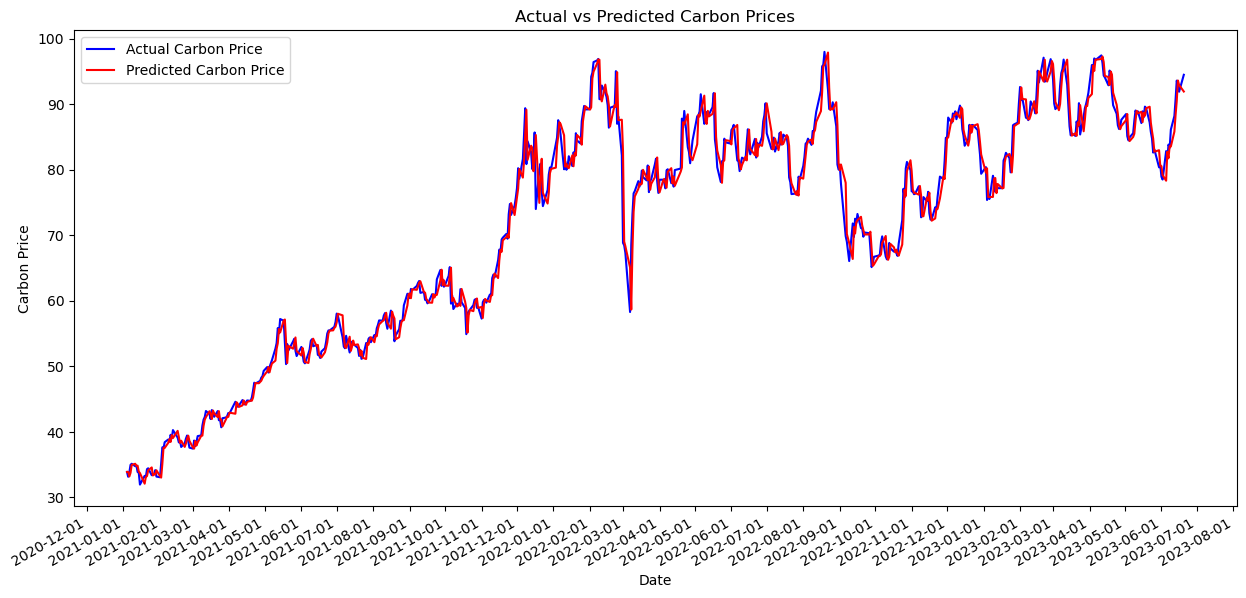

In [39]:
dates = df_arima['Date']
date_train = dates[train_indices]

plt.figure(figsize=(15, 7))
plt.plot(date_train, y_train, label='Actual Carbon Price', color='blue')
plt.plot(date_train, y_train_pred_a, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

In [40]:
# Perform out-of-sample test with daily actual data updates
y_test_pred_a = []  # Store predictions
history = y_train.tolist()  # Initialize with training data

# Loop through test set to predict each day and update with actual data
for t in range(len(y_test)):
    a_test_model = ARIMA(history, order=(1,1,1))
    a_test_model_fit = a_test_model.fit()
    
    # Predict the next value
    forecast = a_test_model_fit.forecast()
    y_test_pred_a.append(forecast[0])
    
    # Update history with actual data for next iteration
    history.append(y_test.iloc[t])

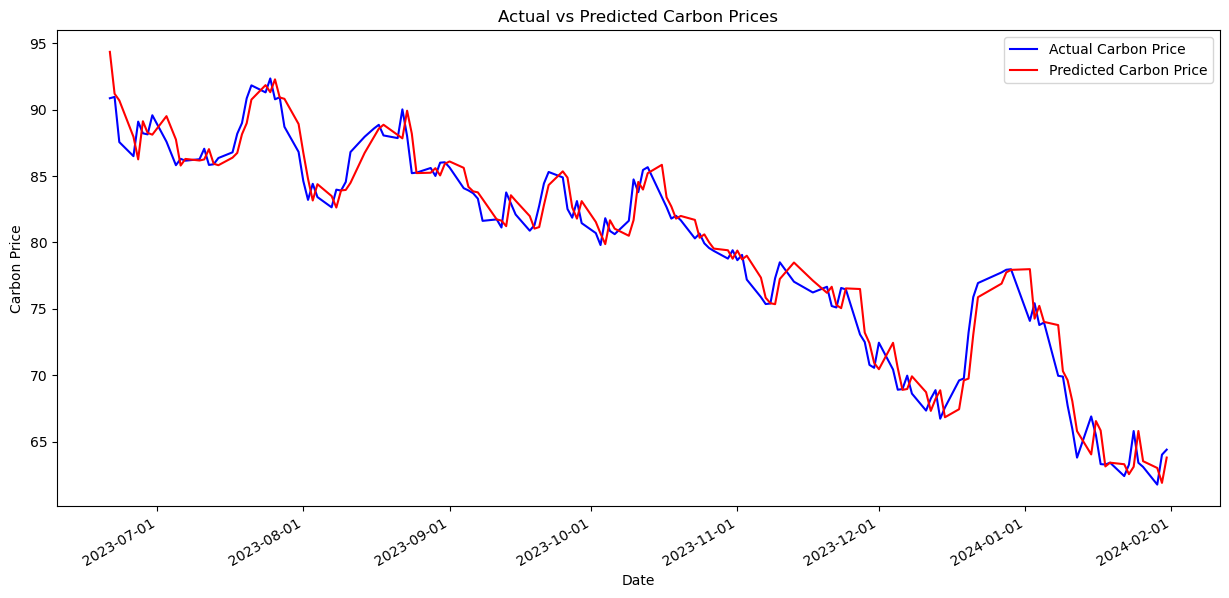

In [41]:
dates = df_arima['Date']
date_test = dates[test_indices]

plt.figure(figsize=(15, 7))
plt.plot(date_test, y_test, label='Actual Carbon Price', color='blue')
plt.plot(date_test, y_test_pred_a, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

In [42]:
# Ensure y_test_pred_a is a NumPy array before reshaping
y_test_pred_a = np.array(y_test_pred_a)

# Reshape the test set values and predictions into the required format
y_test_reshaped_a = y_test.values.reshape(-1, 1)  # or y_test.to_numpy().reshape(-1, 1)
y_test_pred_reshaped_a = y_test_pred_a.reshape(-1, 1)

# Initialize and fit the linear regression model
reg = linear_model.LinearRegression()
reg.fit(y_test_pred_reshaped_a, y_test_reshaped_a)

# Calculate R-squared on the test data
r_squared_a_test = reg.score(y_test_pred_reshaped_a, y_test_reshaped_a)
r_squared_a_test


0.9669009386886934

In [43]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_a))
print(f"Out-of-Sample RMSE: {rmse}")

# Calculate MSE
mse = mean_squared_error(y_test, y_test_pred_a)
print(f"Out-of-Sample MSE: {mse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_test_pred_a)
print(f"Out-of-Sample MAE: {mae}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_test_pred_a) / y_test)) * 100
print(f"Out-of-Sample MAPE: {mape}%") 

Out-of-Sample RMSE: 1.4724394392910662
Out-of-Sample MSE: 2.1680779023797894
Out-of-Sample MAE: 1.1658466503933282
Out-of-Sample MAPE: 1.4968705734676724%


### ARIMAX Model

In [44]:
X = df_arima.drop(['Date', 'Carbon'], axis=1)
y = df_arima['Carbon']

In [45]:
train_size = int(len(df_arima) * 0.8)
train_indices = df_arima.index[:train_size]
test_indices = df_arima.index[train_size:]

y_train, y_test = y.loc[train_indices], y.loc[test_indices]
X_train, X_test = X.loc[train_indices], X.loc[test_indices]

In [46]:
arima_model = ARIMA(y_train, exog=X_train, order=(1,1,1))
arima_model_fit = arima_model.fit()

print(arima_model_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  610
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1307.670
Date:                Wed, 25 Sep 2024   AIC                           2641.339
Time:                        11:45:29   BIC                           2698.693
Sample:                             0   HQIC                          2663.651
                                - 610                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fit_for_55            0.7678     25.797      0.030      0.976     -49.794      51.329
Law                  -3.0554     10.133     -0.302      0.763     -22.917      16.806
Compromise            2.

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### In Sample

In [47]:
y_train_pred_arima = arima_model_fit.predict(in_sample=True, exog=X_train, return_conf_int=False)

In [48]:
y_train_pred_arima.iloc[0] = df['Carbon'].iloc[0]

In [49]:
y_train_reshaped_arima = y_train.values.reshape(-1, 1)
y_train_pred_reshaped_arima = y_train_pred_arima.values.reshape(-1, 1)

reg = linear_model.LinearRegression()

reg.fit(y_train_pred_reshaped_arima, y_train_reshaped_arima)

r_squared_arima_train = reg.score(y_train_pred_reshaped_arima, y_train_reshaped_arima)
r_squared_arima_train

0.986204275585935

In [50]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_arima))
print(f"Out-of-Sample RMSE: {rmse}")

# Calculate MSE
mse = mean_squared_error(y_train, y_train_pred_arima)
print(f"Out-of-Sample MSE: {mse}")

# Calculate MAE
mae = mean_absolute_error(y_train, y_train_pred_arima)
print(f"Out-of-Sample MAE: {mae}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_train - y_train_pred_arima) / y_train)) * 100
print(f"Out-of-Sample MAPE: {mape}%") 

Out-of-Sample RMSE: 2.0698143912942744
Out-of-Sample MSE: 4.284131614408887
Out-of-Sample MAE: 1.4950101943611773
Out-of-Sample MAPE: 2.082548910650983%


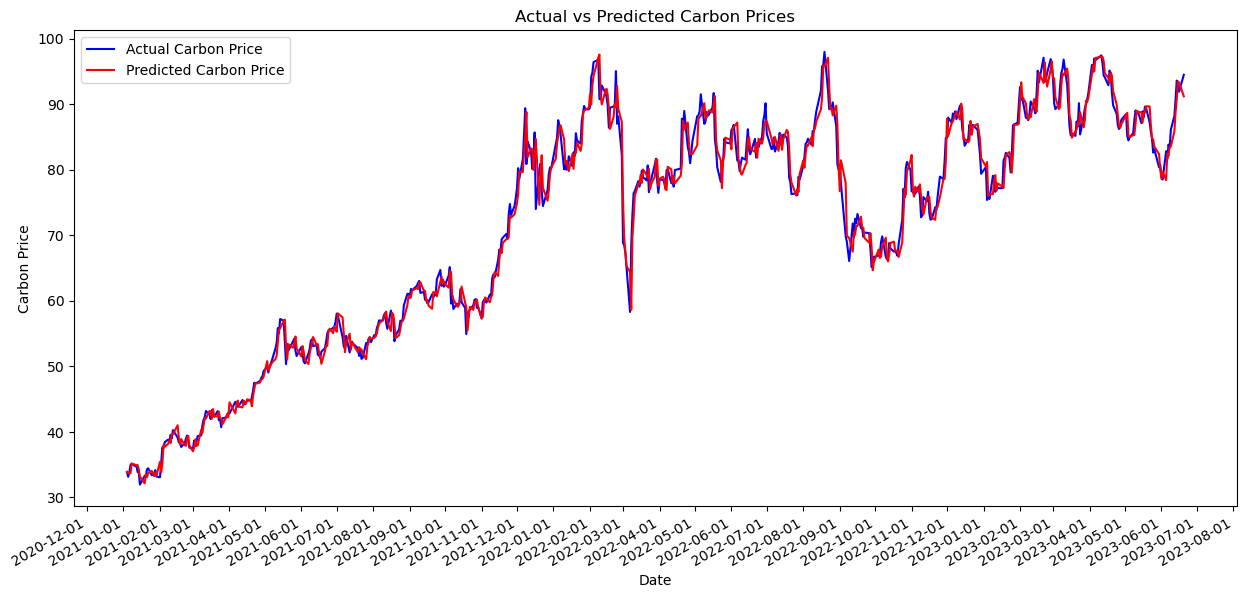

In [51]:
dates = df_arima['Date']
date_train = dates[train_indices]

plt.figure(figsize=(15, 7))
plt.plot(date_train, y_train, label='Actual Carbon Price', color='blue')
plt.plot(date_train, y_train_pred_arima, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

#### Out of Sample

In [52]:
# Perform out-of-sample test with daily actual data updates
y_test_pred_arima = []  # Store predictions
history = y_train.tolist()  # Initialize with training data
exog_history = X_train.values.tolist()

# Loop through test set to predict each day and update with actual data
for t in range(len(y_test)):
    X_input = X_test.iloc[t].values.reshape(1, -1)  # Exogenous variables for day t
    arima_test_model = ARIMA(history, exog=exog_history, order=(1,1,1))
    arima_test_model_fit = arima_test_model.fit()
    
    # Predict the next value
    forecast = arima_test_model_fit.forecast(exog=X_input)
    y_test_pred_arima.append(forecast[0])
    
    # Update history with actual data for next iteration
    history.append(y_test.iloc[t])
    exog_history.append(X_input[0])

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Eri

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Eri

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Eri

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Eri

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Eri

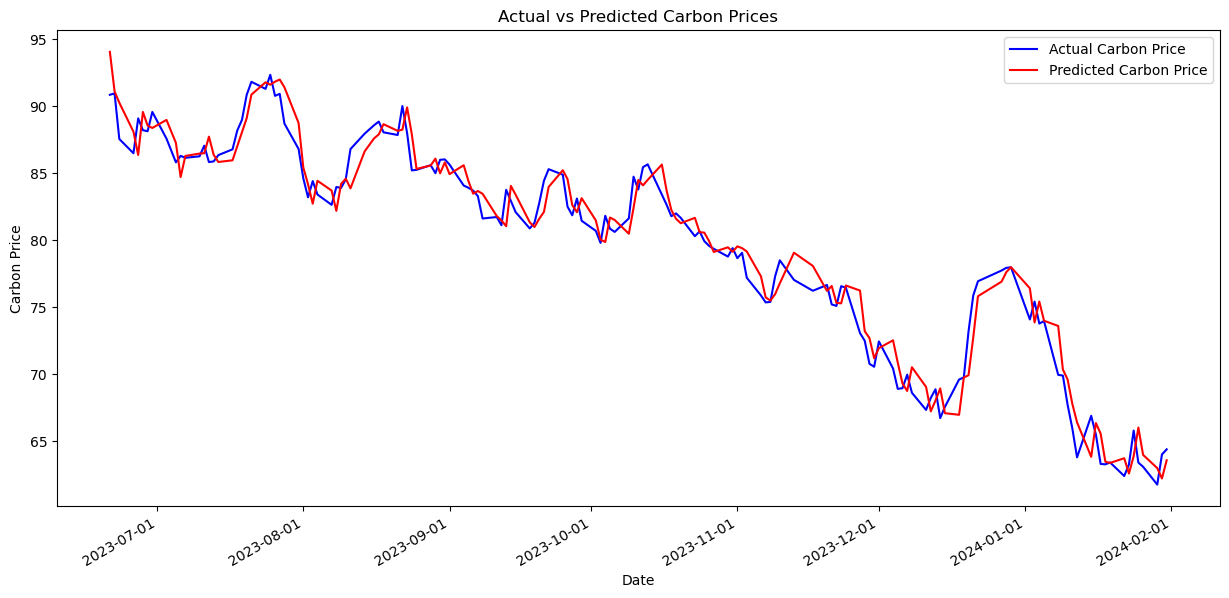

In [53]:
dates = df_arima['Date']
date_test = dates[test_indices]

plt.figure(figsize=(15, 7))
plt.plot(date_test, y_test, label='Actual Carbon Price', color='blue')
plt.plot(date_test, y_test_pred_arima, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

In [54]:
residuals = y_test - y_test_pred_arima

# Perform White test
exog = np.column_stack([X_test, X_test**2])  # Include the original exogenous variables and their squares
white_test = het_white(residuals, exog)

# Extract test results
white_stat, white_p_val, _, _ = white_test

print(f"White test statistic: {white_stat}")
print(f"p-value of the White test: {white_p_val}")

White test statistic: 123.14891655588096
p-value of the White test: 0.1674210768508504


In [57]:
y_test_pred_arima = np.array(y_test_pred_arima)
y_test_reshaped_arima = y_test.values.reshape(-1, 1)
y_test_pred_reshaped_arima = y_test_pred_arima.reshape(-1, 1)

reg = linear_model.LinearRegression()

reg.fit(y_test_pred_reshaped_arima, y_test_reshaped_arima)

r_squared_arima_test = reg.score(y_test_pred_reshaped_arima, y_test_reshaped_arima)
r_squared_arima_test

0.9674417780889161

In [58]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_arima))
print(f"Out-of-Sample RMSE: {rmse}")

# Calculate MSE
mse = mean_squared_error(y_test, y_test_pred_arima)
print(f"Out-of-Sample MSE: {mse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_test_pred_arima)
print(f"Out-of-Sample MAE: {mae}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_test_pred_arima) / y_test)) * 100
print(f"Out-of-Sample MAPE: {mape}%") 

Out-of-Sample RMSE: 1.4580526901556754
Out-of-Sample MSE: 2.125917647270202
Out-of-Sample MAE: 1.1879287263330236
Out-of-Sample MAPE: 1.5257501546290597%


### Random Forest

##### Times Series Random Forest

In [59]:
X = df.drop(['Date', 'Carbon'], axis=1)
y = df['Carbon']

In [60]:
train_size = int(len(df_arima) * 0.8)
train_indices = df.index[:train_size]
test_indices = df.index[train_size:]

y_train, y_test = y.loc[train_indices], y.loc[test_indices]
X_train, X_test = X.loc[train_indices], X.loc[test_indices]

In [62]:
from sklearn.model_selection import GridSearchCV, cross_val_score


# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
    'max_depth': [5, 10, 15, 20, None],         # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],            # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']    # Number of features to consider at each split
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Set up the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best parameters found: ", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

Fitting 3 folds for each of 675 candidates, totalling 2025 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [63]:
# Use the best estimator from GridSearchCV
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', random_state=42)

#### In Sample

In [64]:
y_train_pred_rf = best_rf_model.predict(X_train)

# Reshape the data for sklearn (linear regression expects 2D arrays)
y_train_pred_rf_reshaped = y_train_pred_rf.reshape(-1, 1)
y_train_reshaped = y_train.values.reshape(-1, 1)  # Convert to array and reshape if needed

# Initialize the Linear Regression model
reg = linear_model.LinearRegression()

# Fit the linear regression model on the predicted and actual values
reg.fit(y_train_pred_rf_reshaped, y_train_reshaped)

# Calculate the R-squared value
r_squared = r2_score(y_train_reshaped, y_train_pred_rf_reshaped)
print("R-squared value:", r_squared)

R-squared value: 0.9927733519140569


In [65]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
print(f"Out-of-Sample RMSE: {rmse}")

# Calculate MSE
mse = mean_squared_error(y_train, y_train_pred_rf)
print(f"Out-of-Sample MSE: {mse}")

# Calculate MAE
mae = mean_absolute_error(y_train, y_train_pred_rf)
print(f"Out-of-Sample MAE: {mae}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_train - y_train_pred_rf) / y_train)) * 100
print(f"Out-of-Sample MAPE: {mape}%")

Out-of-Sample RMSE: 1.4938740863676339
Out-of-Sample MSE: 2.2316597859207326
Out-of-Sample MAE: 1.0375014889425398
Out-of-Sample MAPE: 1.3945923935175393%


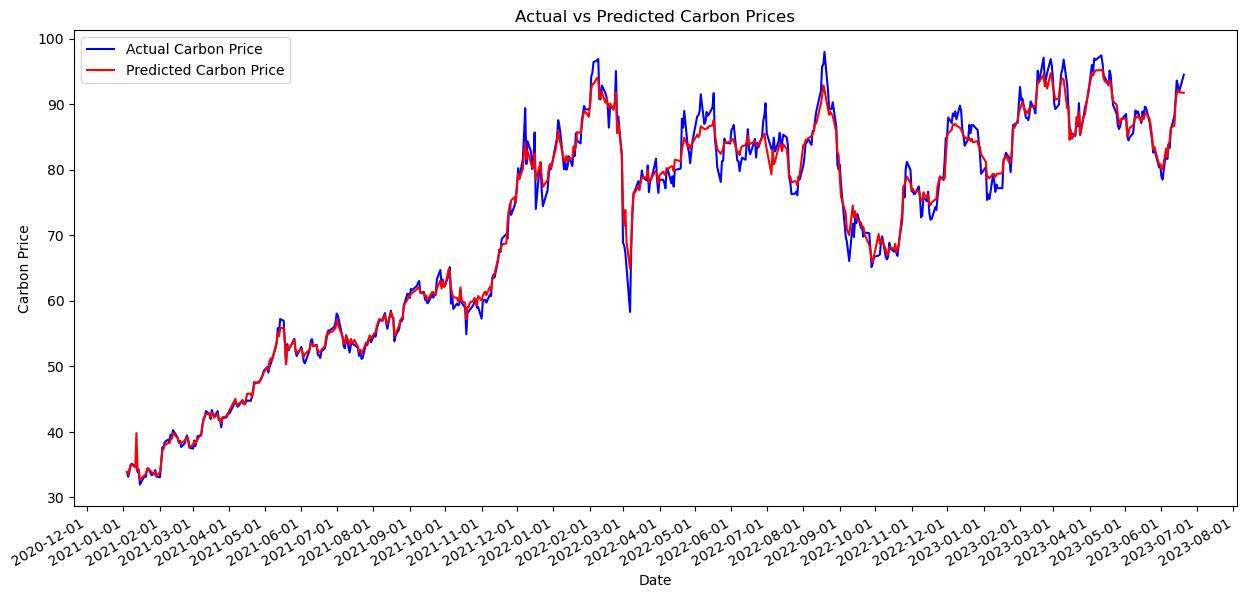

In [66]:
dates = df['Date']
date_train = dates[train_indices]

plt.figure(figsize=(15, 7))
plt.plot(date_train, y_train, label='Actual Carbon Price', color='blue')
plt.plot(date_train, y_train_pred_rf, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

#### Out of Sample - Cross Validation

In [67]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

In [68]:
# Define TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)  # 5 splits for example, adjust based on your data

In [69]:
# Initialize the RandomForestRegressor with your chosen hyperparameters
rf_model = RandomForestRegressor(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Perform cross-validation
cv_results = cross_val_score(rf_model, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE
rmse_cv = np.sqrt(-cv_results)

# Output the cross-validation results
print("Time-Series Cross-Validation RMSE for each fold:", rmse_cv)
print("Average RMSE across folds:", np.mean(rmse_cv))

Time-Series Cross-Validation RMSE for each fold: [ 7.60631899 22.722582   11.72020425  9.3399703  19.28543569]
Average RMSE across folds: 14.134902247613732


In [70]:
# Store predictions
history_X_rf = X_train.values.tolist()  # Start with the exogenous variables (training set)
history_y_rf = y_train.tolist()  # Start with the target values (training set)
y_test_pred_rf = []

# Loop through the test set, predicting day by day, and updating the history
for t in range(len(y_test)):
    # Get the exogenous input for day t
    X_input = X_test.iloc[t].values.reshape(1, -1)
    
    # Train a new Random Forest model on the current history
    rf_test_model = RandomForestRegressor(
        max_depth=10,
        max_features='sqrt',
        min_samples_leaf=1,
        min_samples_split=2,
        n_estimators=100,
        random_state=42
        )
    rf_test_model.fit(np.array(history_X_rf), np.array(history_y_rf))
    
    # Predict the next value (carbon price for day t)
    forecast = rf_test_model.predict(X_input)
    y_test_pred_rf.append(forecast[0])  # Store the prediction
    
    # Update history with the actual test data for the next iteration
    history_y_rf.append(y_test.iloc[t])  # Append the actual value for day t
    history_X_rf.append(X_input[0])  # Append the exogenous variables for day 

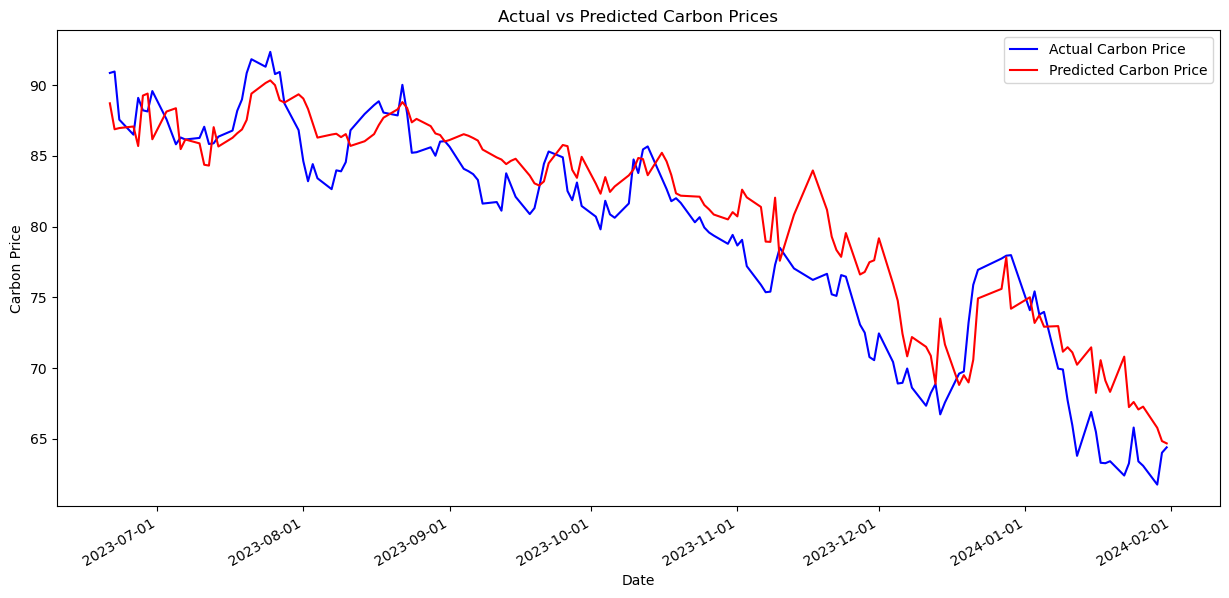

In [71]:
dates = df['Date']
date_test = dates[test_indices]

plt.figure(figsize=(15, 7))
plt.plot(date_test, y_test, label='Actual Carbon Price', color='blue')
plt.plot(date_test, y_test_pred_rf, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

In [73]:
y_test_pred_rf = np.array(y_test_pred_rf)
# Reshape the data for sklearn (linear regression expects 2D arrays)
y_test_pred_rf_reshaped = y_test_pred_rf.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)  # Convert to array and reshape if needed

# Initialize the Linear Regression model
reg = linear_model.LinearRegression()

# Fit the linear regression model on the predicted and actual values
reg.fit(y_test_pred_rf_reshaped, y_test_reshaped)

# Calculate the R-squared value
r_squared = r2_score(y_test_reshaped, y_test_pred_rf_reshaped)
print("R-squared value:", r_squared)

R-squared value: 0.8512303687059025


In [74]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
print(f"Out-of-Sample RMSE: {rmse}")

# Calculate MSE
mse = mean_squared_error(y_test, y_test_pred_rf)
print(f"Out-of-Sample MSE: {mse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_test_pred_rf)
print(f"Out-of-Sample MAE: {mae}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_test_pred_rf) / y_test)) * 100
print(f"Out-of-Sample MAPE: {mape}%")

Out-of-Sample RMSE: 3.0805810276696355
Out-of-Sample MSE: 9.489979468038108
Out-of-Sample MAE: 2.502852364950534
Out-of-Sample MAPE: 3.3099129274793873%


### LSTM Model

In [75]:
# Normalize features
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

# Assuming 'features' and 'target' are defined in your dataframe 'df'
features = df.drop(['Date', 'Carbon'], axis=1)
target = df['Carbon']

In [76]:
# Scale the features and target
features_scaled = scaler_features.fit_transform(features)
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))

In [77]:
# Split data into training and testing sets (80% training, 20% testing)
train_size = int(len(features_scaled) * 0.8)
X_train, X_test = features_scaled[:train_size], features_scaled[train_size:]
y_train, y_test = target_scaled[:train_size], target_scaled[train_size:]

In [78]:
# Reshape input for LSTM: [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

#### Find Best Parameters

In [79]:
# Define a function to create the LSTM model
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [81]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Use KerasRegressor wrapper for the model
model = KerasRegressor(build_fn=create_model, verbose=1)

In [83]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter space for RandomizedSearchCV
param_grid = {
    'batch_size': [1, 2, 3, 4, 5],
    'epochs': [10, 50, 100],
    'optimizer': ['sgd', 'rmsprop', 'adagrad', 'adadelta', 'adam', 'adamax', 'nadam']
}

# Perform RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3, scoring='neg_mean_squared_error')
random_search_result = random_search.fit(X_train, y_train)

# Output the best parameters and results
print("Best Score: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))
best_params = random_search_result.best_params_

Epoch 1/50
305/305 [==============================] - 1s 3ms/step - loss: 0.0531
Epoch 2/50
305/305 [==============================] - 1s 4ms/step - loss: 0.0153
Epoch 3/50
305/305 [==============================] - 1s 4ms/step - loss: 0.0120
Epoch 4/50
305/305 [==============================] - 1s 4ms/step - loss: 0.0094
Epoch 5/50
305/305 [==============================] - 1s 4ms/step - loss: 0.0080
Epoch 6/50
305/305 [==============================] - 1s 4ms/step - loss: 0.0068
Epoch 7/50
305/305 [==============================] - 1s 3ms/step - loss: 0.0065
Epoch 8/50
305/305 [==============================] - 1s 3ms/step - loss: 0.0059
Epoch 9/50
305/305 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 10/50
305/305 [==============================] - 1s 3ms/step - loss: 0.0054
Epoch 11/50
305/305 [==============================] - 1s 3ms/step - loss: 0.0054
Epoch 12/50
305/305 [==============================] - 1s 3ms/step - loss: 0.0050
Epoch 13/50
305/305 [====

#### In Sample Performance

In [92]:
# Use the best parameters to train the final model
best_model = create_model(optimizer=best_params['optimizer'])

# Fit the final model using the best batch size and number of epochs
best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

Epoch 1/50
305/305 [==============================] - 1s 3ms/step - loss: 0.0516
Epoch 2/50
305/305 [==============================] - 1s 3ms/step - loss: 0.0153
Epoch 3/50
305/305 [==============================] - 1s 3ms/step - loss: 0.0121
Epoch 4/50
305/305 [==============================] - 1s 3ms/step - loss: 0.0099
Epoch 5/50
305/305 [==============================] - 1s 3ms/step - loss: 0.0083
Epoch 6/50
305/305 [==============================] - 1s 4ms/step - loss: 0.0072
Epoch 7/50
305/305 [==============================] - 2s 5ms/step - loss: 0.0066
Epoch 8/50
305/305 [==============================] - 2s 5ms/step - loss: 0.0060
Epoch 9/50
305/305 [==============================] - 1s 4ms/step - loss: 0.0055
Epoch 10/50
305/305 [==============================] - 1s 4ms/step - loss: 0.0053
Epoch 11/50
305/305 [==============================] - 1s 4ms/step - loss: 0.0051
Epoch 12/50
305/305 [==============================] - 1s 4ms/step - loss: 0.0048
Epoch 13/50
305/305 [====

In [93]:
# Make predictions on training data to check in-sample performance
y_train_pred_lstm = best_model.predict(X_train)

# Inverse transform predictions and actual values to original scale
y_train_pred_lstm = scaler_target.inverse_transform(y_train_pred_lstm)
y_train_original = scaler_target.inverse_transform(y_train)

In [94]:
# Reshape the data for sklearn (linear regression expects 2D arrays)
y_train_pred_lstm_reshaped = y_train_pred_lstm.reshape(-1, 1)
y_train_reshaped = y_train_original.reshape(-1, 1)  # Convert to array and reshape if needed

# Initialize the Linear Regression model
reg = linear_model.LinearRegression()

# Fit the linear regression model on the predicted and actual values
reg.fit(y_train_pred_lstm_reshaped, y_train_reshaped)

# Calculate the R-squared value
r_squared = r2_score(y_train_reshaped, y_train_pred_lstm_reshaped)
print("R-squared value:", r_squared)

R-squared value: 0.9560713863304776


In [95]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train_original,  y_train_pred_lstm))
print(f"Out-of-Sample RMSE: {rmse}")

# Calculate MSE
mse = mean_squared_error(y_train_original, y_train_pred_lstm)
print(f"Out-of-Sample MSE: {mse}")

# Calculate MAE
mae = mean_absolute_error(y_train_original,  y_train_pred_lstm)
print(f"Out-of-Sample MAE: {mae}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_train_original -  y_train_pred_lstm) / y_train_original)) * 100
print(f"Out-of-Sample MAPE: {mape}%")

Out-of-Sample RMSE: 3.683149008574576
Out-of-Sample MSE: 13.56558661936388
Out-of-Sample MAE: 2.922151559048012
Out-of-Sample MAPE: 4.270394780710298%


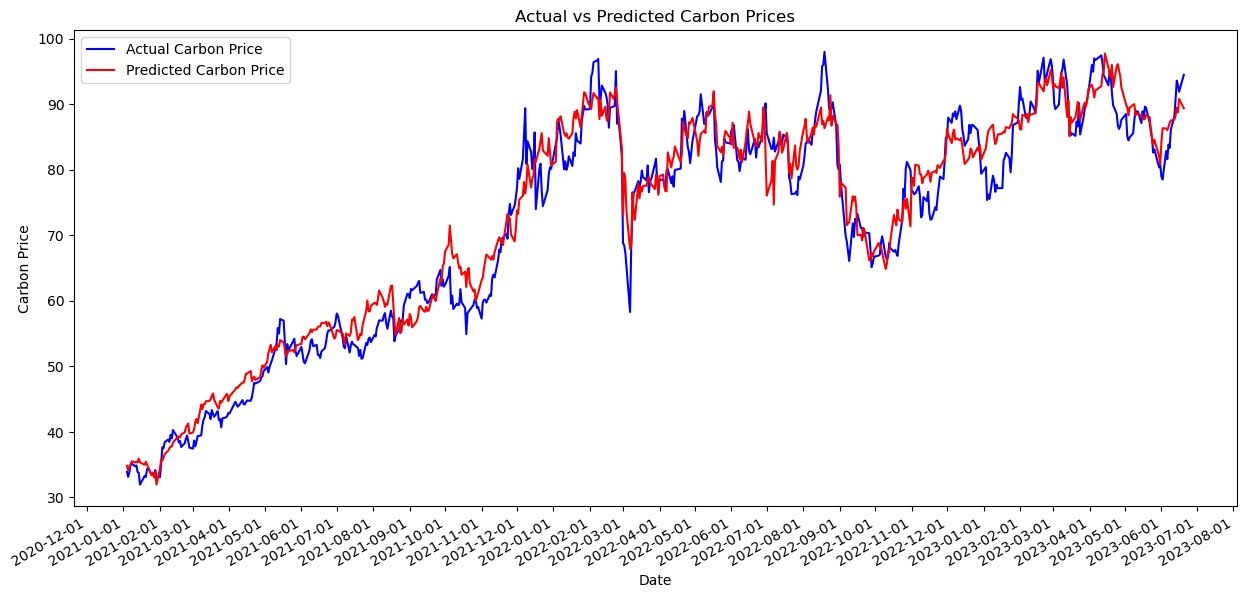

In [96]:
dates = df['Date']
date_train = dates[train_indices]

plt.figure(figsize=(15, 7))
plt.plot(date_train, y_train_original, label='Actual Carbon Price', color='blue')
plt.plot(date_train, y_train_pred_lstm, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

#### Out of Sample Performance

In [ ]:
# Store predictions and actual values
history_X_lstm = X_train.tolist()  # Start with the exogenous variables (training set)
history_y_lstm = y_train.tolist()  # Start with the target values (training set)
y_test_pred_lstm = []

# Loop through the test set, predicting day by day, and updating the history
for t in range(len(X_test)):
    # Convert the history back into a numpy array and reshape for LSTM input
    X_train_rolling = np.array(history_X_lstm).reshape(len(history_X_lstm), 1, X_train.shape[2])
    y_train_rolling = np.array(history_y_lstm)

    # Recreate and re-train the LSTM model using the updated history
    rolling_model = Sequential()
    rolling_model.add(LSTM(50, input_shape=(X_train_rolling.shape[1], X_train_rolling.shape[2]), return_sequences=True))
    rolling_model.add(LSTM(50))
    rolling_model.add(Dense(1))
    rolling_model.compile(loss='mean_squared_error', optimizer='adam')
    
    # Train the model with the updated history
    rolling_model.fit(X_train_rolling, y_train_rolling, epochs=50, batch_size=72, verbose=0)
    
    # Get the exogenous input for day t from the test set
    X_input = X_test[t].reshape(1, 1, X_test.shape[2])  # Reshape input for LSTM
    
    # Predict the next value (carbon price for day t)
    forecast = rolling_model.predict(X_input)
    y_test_pred_lstm.append(forecast[0][0])  # Store the prediction
    
    # Update history with the actual test data for the next iteration
    history_y_lstm.append(y_test[t])  # Append the actual value for day t
    history_X_lstm.append(X_test[t])  # Append the exogenous variables for day t

In [ ]:
# Inverse transform predictions and actual values to original scale
y_test_pred_lstm = scaler_target.inverse_transform(np.array(y_test_pred_lstm).reshape(-1, 1))
y_test_actual = scaler_target.inverse_transform(np.array(y_test).reshape(-1, 1))

In [ ]:
# Reshape the data for sklearn (linear regression expects 2D arrays)
y_test_pred_lstm_reshaped = y_test_pred_lstm.reshape(-1, 1)
y_test_reshaped = y_test_actual.values.reshape(-1, 1)  # Convert to array and reshape if needed

# Initialize the Linear Regression model
reg = linear_model.LinearRegression()

# Fit the linear regression model on the predicted and actual values
reg.fit(y_test_pred_lstm_reshaped, y_test_reshaped)

# Calculate the R-squared value
r_squared = r2_score(y_test_reshaped, y_test_pred_lstm_reshaped)
print("R-squared value:", r_squared)

In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual,  y_test_pred_lstm))
print(f"Out-of-Sample RMSE: {rmse}")

# Calculate MSE
mse = mean_squared_error(y_test_actual, y_test_pred_lstm)
print(f"Out-of-Sample MSE: {mse}")

# Calculate MAE
mae = mean_absolute_error(y_test_actual,  y_test_pred_lstm)
print(f"Out-of-Sample MAE: {mae}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test_actual -  y_test_pred_lstm) / y_test_actual)) * 100
print(f"Out-of-Sample MAPE: {mape}%")

In [ ]:
dates = df['Date']
date_test = dates[test_indices]

plt.figure(figsize=(15, 7))
plt.plot(date_test, y_test_actual, label='Actual Carbon Price', color='blue')
plt.plot(date_test, y_test_pred_lstm, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

## 5.4 Discussion

# Section VI Conclusion